# NEXT-100 Radioactive Budget

Revisiting NEXT-100 radioactive budget

In [1]:
from pynext.system_of_units import *

In [2]:
import os
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

import time
import glob
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy.testing as npt
from operator import itemgetter, attrgetter
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

2017-12-22 12:56:38


In [3]:
from src.activity_of_lsc_pv_and_shielding import lsc_activity
from src.activity_of_lsc_pv_and_shielding import shield_and_pv_activity

In [4]:
from src.activity_of_sensors import sensor_activity
from src.activity_field_cage import field_cage_activity

## LSC activity

In [5]:
act_lsc = lsc_activity()
act_lsc

,name,body_bi214,head_bi214,body_tl208,head_tl208
0,LSC activity,263190.066147,111855.778113,3.359262e+06,1.427686e+06
1,activity after Pb,12.307782,5.230807,1.570921e+02,6.676412e+01
2,activity after Cu,0.185807,0.078968,2.371569e+00,1.007917e+00


## Residual shield activity and activity of PV

In [6]:
act_shield_and_pv = shield_and_pv_activity()
act_shield_and_pv

,name,body_bi214,head_bi214,body_tl208,head_tl208
0,PB activity after Cu,3.209227,0.604396,0.633172,0.119246
1,PV activity after Cu,2.968434,0.716252,0.445265,0.107438
2,activity of CS (ss),6.058342,0.957609,0.706807,0.111721


## Activity due to Sensors

In [7]:
act_sensors = sensor_activity()
act_sensors

,name,bi214,tl208
0,PMT activity,16.477500,7.860000
1,SiPM activity,0.192089,0.192089
2,KDB activity,0.930431,0.450208


## Activity due to Field Cage

In [8]:
act_fc = field_cage_activity()
act_fc

,name,bi214,tl208
0,ActivityElectrodesFC,1.159275,0.135249
1,ActivityResistorsFC,1.939167,0.335833
2,ActivityPoly,2.628091,0.339109


## Plots

In [9]:
bi214_lsc = act_lsc.body_bi214[2] + act_lsc.head_bi214[2]
tl208_lsc = act_lsc.body_tl208[2] + act_lsc.head_tl208[2]

In [10]:
bi214_pb = act_shield_and_pv.body_bi214[0] + act_shield_and_pv.head_bi214[0]
tl208_pb = act_shield_and_pv.body_tl208[0] + act_shield_and_pv.head_tl208[0]
bi214_pv = act_shield_and_pv.body_bi214[1] + act_shield_and_pv.head_bi214[1]
tl208_pv = act_shield_and_pv.body_tl208[1] + act_shield_and_pv.head_tl208[1]
bi214_cu = act_shield_and_pv.body_bi214[2] + act_shield_and_pv.head_bi214[2]
tl208_cu = act_shield_and_pv.body_tl208[2] + act_shield_and_pv.head_tl208[2]

In [11]:
bi214_pmts = act_sensors.bi214[0]
tl208_pmts = act_sensors.tl208[0]

In [12]:
bi214_kdbs = act_sensors.bi214[2]
tl208_kdbs = act_sensors.tl208[2]

In [13]:
bi214_electrodes = act_fc.bi214[0]
tl208_electrodes = act_fc.tl208[0]
bi214_resistors = act_fc.bi214[1]
tl208_resistors = act_fc.tl208[1]
bi214_poly = act_fc.bi214[2]
tl208_poly = act_fc.tl208[2]

In [14]:
activity_bi214 = (bi214_lsc, bi214_pb, bi214_pv, bi214_cu,
                  bi214_pmts, bi214_kdbs, bi214_electrodes, bi214_resistors, bi214_poly)
activity_tl208 = (tl208_lsc, tl208_pb, tl208_pv, tl208_cu,
                  tl208_pmts, tl208_kdbs, tl208_electrodes, tl208_resistors, tl208_poly)

labels         = ('LSC', 'Pb', 'PV', 'CU','PMTs', 'KDBs', 'FR', 'RE','Poly')

In [15]:
def plot_activities_vertical_bars(activities, labels, width=0.35):
    
    def autolabel(rects):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom')

    
    activity_bi214, activity_tl208 = activities
    N = len(activity_bi214)
    ind = np.arange(N)  # the x locations for the groups
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, activity_bi214, width, color='r')
    rects2 = ax.bar(ind + width, activity_tl208, width, color='y')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Activity in mBq')
    ax.set_title('NEXT-100 radioactive budget')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(labels)

    ax.legend((rects1[0], rects2[0]), ('bi214', 'tl208'))

    autolabel(rects1)
    autolabel(rects2)

    plt.show()
    

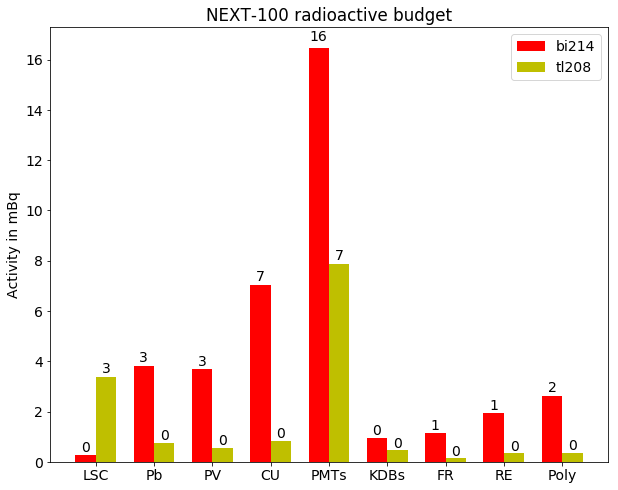

In [16]:
plot_activities_vertical_bars((activity_bi214, activity_tl208), labels, width=0.35)

In [17]:
bi214_pmts * 1e-3 * 365 * 24 * 60 * 60 / 2e+6

0.2598172199999999